<a href="https://colab.research.google.com/github/GabrielPeCarvalho/Elevator/blob/main/IC1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.decomposition import PCA
import pandas as pd
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from sklearn.model_selection import train_test_split, RepeatedKFold, RandomizedSearchCV
from google.colab import drive
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.utils import parallel_backend
from tqdm import tqdm
from time import time
import pickle
from scipy.stats import randint, loguniform, reciprocal
from scipy import stats
from scipy.stats.stats import mode


<ipython-input-1-7a746a965402>:26: DeprecationWarning: Please import `mode` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.stats.stats import mode


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Carregar os dados

In [ ]:
M1 = list()
target = list()
target_names = list()
names = list()

path = r'/content/drive/MyDrive/dadosIC'
files = os.listdir(path)
df = pd.DataFrame()

Generalizacao da analise de todos os casos


In [ ]:
c = 0
for e in files:
    names.append(e)
    path2 = path + '/' + e
    pasta = os.listdir(path2)
    files_xlsx = [path2 + '/' + f for f in pasta if f[-4:]=='xlsx']


    '''Generalização da análise de todos os casos'''

    for f in files_xlsx:
      data = pd.read_excel(f)
      df = data
      time = df.iloc[:,0]
      vd_frac = df.iloc[:,1]
      acous = df.iloc[:,2]
      f, t, Sxx = signal.spectrogram(acous)

      freq_feat = 10*np.log(Sxx).reshape([1,-1])

      '''Construção da matriz M1'''

      M1.append(freq_feat[0])
      target.append(c)
      target_names.append(e)
    c+=1

pickle load

In [ ]:
pca = PCA(n_components=0.95)

M2 = pca.fit_transform(M1)



In [ ]:
print(len(M1))
print(M2.shape)
print(target)
print(len(target))

800
(800, 670)
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 

Plot PCA

Total explained_variance
95.00269041112068
Total components
(670,)


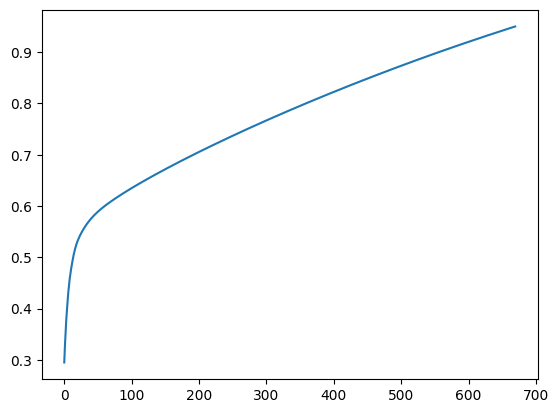

In [ ]:
print("Total explained_variance")
print(np.sum(pca.explained_variance_ratio_*100))
print("Total components")
print(pca.explained_variance_ratio_.shape)

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

Plot das duas componentes principais

In [ ]:
list_names = ["Slug - 15Nm³/h","Slug - 45Nm³/h","Plug - 5Nm³/h","Wavy - 55Nm³/h","Estratificado Liso - 7Nm³/h","Estratificado Ondulado - 24Nm³/h","Plug - 10Nm³/h","Estratificado Ondulado - 16Nm³/h"]

print(target_names)
print(len(target_names))


['Slug_15nm3h', 'Slug_15nm3h', 'Slug_15nm3h', 'Slug_15nm3h', 'Slug_15nm3h', 'Slug_15nm3h', 'Slug_15nm3h', 'Slug_15nm3h', 'Slug_15nm3h', 'Slug_15nm3h', 'Slug_15nm3h', 'Slug_15nm3h', 'Slug_15nm3h', 'Slug_15nm3h', 'Slug_15nm3h', 'Slug_15nm3h', 'Slug_15nm3h', 'Slug_15nm3h', 'Slug_15nm3h', 'Slug_15nm3h', 'Slug_15nm3h', 'Slug_15nm3h', 'Slug_15nm3h', 'Slug_15nm3h', 'Slug_15nm3h', 'Slug_15nm3h', 'Slug_15nm3h', 'Slug_15nm3h', 'Slug_15nm3h', 'Slug_15nm3h', 'Slug_15nm3h', 'Slug_15nm3h', 'Slug_15nm3h', 'Slug_15nm3h', 'Slug_15nm3h', 'Slug_15nm3h', 'Slug_15nm3h', 'Slug_15nm3h', 'Slug_15nm3h', 'Slug_15nm3h', 'Slug_15nm3h', 'Slug_15nm3h', 'Slug_15nm3h', 'Slug_15nm3h', 'Slug_15nm3h', 'Slug_15nm3h', 'Slug_15nm3h', 'Slug_15nm3h', 'Slug_15nm3h', 'Slug_15nm3h', 'Slug_15nm3h', 'Slug_15nm3h', 'Slug_15nm3h', 'Slug_15nm3h', 'Slug_15nm3h', 'Slug_15nm3h', 'Slug_15nm3h', 'Slug_15nm3h', 'Slug_15nm3h', 'Slug_15nm3h', 'Slug_15nm3h', 'Slug_15nm3h', 'Slug_15nm3h', 'Slug_15nm3h', 'Slug_15nm3h', 'Slug_15nm3h', 'Slug_15n

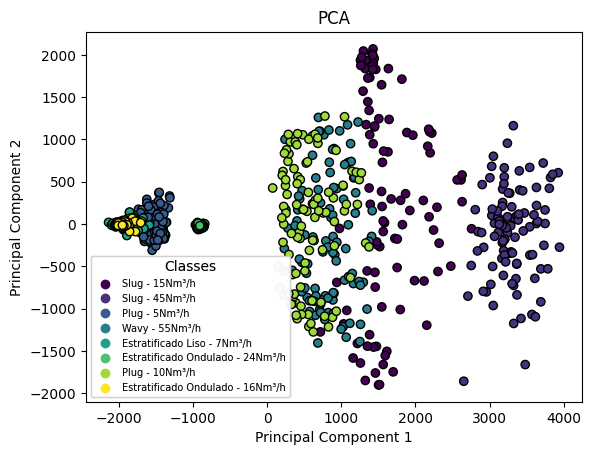

In [ ]:

fig, ax = plt.subplots()
scatter = ax.scatter(M2[:, 0], M2[:, 1], c=target, cmap='viridis', edgecolor='k')

# Ajuste do título e dos rótulos dos eixos
ax.set_title('PCA')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')

# Criação da legenda
handles, _ = scatter.legend_elements()
legend1 = ax.legend(handles, list_names, title="Classes", loc="lower left", fontsize="7")
ax.add_artist(legend1)

# Exibição do gráfico
plt.show()

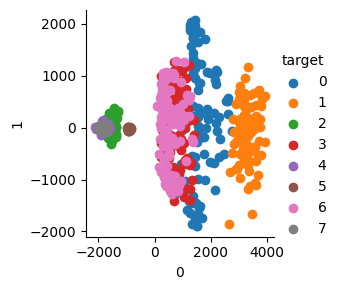

In [ ]:
import seaborn as sns

pca_df = pd.DataFrame(data = M2)

pca_df.sample(10)

pca_df['target'] = target

pca_df.sample(10)

sns.FacetGrid(pca_df,hue = 'target').map(plt.scatter,0,1).add_legend()

LogisticRegression


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(M2, target, random_state=42, test_size = 0.4)

log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
expected = y_test
predicted = log_reg.predict(X_test)
predicted
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87        48
           1       0.82      0.86      0.84        36
           2       1.00      1.00      1.00        36
           3       1.00      1.00      1.00        44
           4       1.00      1.00      1.00        37
           5       0.95      0.98      0.96        41
           6       0.97      0.95      0.96        38
           7       1.00      1.00      1.00        40

    accuracy                           0.95       320
   macro avg       0.95      0.95      0.95       320
weighted avg       0.95      0.95      0.95       320



In [ ]:
log_reg.score(X_test, y_test)

0.953125

In [ ]:
predictions = log_reg.predict(X_test)
cm = confusion_matrix(y_test, predictions)
print(cm)

[[41  7  0  0  0  0  0  0]
 [ 5 31  0  0  0  0  0  0]
 [ 0  0 36  0  0  0  0  0]
 [ 0  0  0 44  0  0  0  0]
 [ 0  0  0  0 37  0  0  0]
 [ 0  0  0  0  0 40  1  0]
 [ 0  0  0  0  0  2 36  0]
 [ 0  0  0  0  0  0  0 40]]


In [ ]:
print(log_reg.predict(X_test))


[6 5 1 5 1 6 3 4 7 4 0 2 6 0 3 3 2 3 6 5 6 5 6 7 3 0 2 6 7 5 2 0 5 3 0 0 6
 3 7 7 1 2 0 3 5 5 4 5 5 5 2 1 6 2 3 3 4 3 0 1 4 7 6 3 2 4 0 7 3 1 5 1 7 0
 0 1 3 4 5 5 4 1 0 0 5 7 7 2 3 0 6 7 2 3 6 6 7 7 0 7 1 4 0 1 0 2 3 7 2 3 4
 5 0 1 7 1 5 7 2 2 3 3 1 7 2 2 5 1 2 6 6 2 0 6 3 5 7 3 6 4 2 5 4 2 0 4 1 3
 6 5 6 0 7 7 5 5 7 7 5 6 2 6 3 3 3 1 1 3 3 4 3 7 1 3 2 6 0 7 6 5 6 5 1 7 6
 0 5 6 4 6 4 4 2 5 5 0 6 0 7 6 2 0 0 5 1 0 0 6 3 4 7 1 0 1 1 1 4 1 2 7 7 1
 6 3 1 4 0 7 7 0 5 2 1 2 2 2 4 3 1 3 4 5 7 4 0 4 1 3 0 2 4 6 2 2 5 3 0 7 3
 3 0 3 7 6 5 3 2 0 5 7 0 0 4 2 4 1 5 5 2 4 4 3 3 4 4 0 6 3 1 2 5 7 0 6 4 1
 1 3 0 4 0 5 7 7 5 4 4 0 4 0 0 1 7 6 4 1 5 5 1 6]


RandomForestClassifier

In [ ]:
X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(M2, target, random_state=42, test_size = 0.4)

voting_clf = VotingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42))])
voting_clf.fit(X_train, y_train)

for name, clf in voting_clf.named_estimators_.items():
  print(name, "=", clf.score(X_test, y_test))

rf = 0.890625


In [ ]:
voting_clf.predict(X_test[:1])
[clf.predict(X_test[:1]) for clf in voting_clf.estimators_]

[array([6])]

In [ ]:
voting_clf.score(X_test, y_test)

0.890625

In [ ]:
voting_clf.voting = "soft"
voting_clf.named_estimators["svc"].probability = True
voting_clf.fit(X_train, y_train)
voting_clf.score(X_test, y_test)

KeyError: 'svc'

In [ ]:
predictions = voting_clf.predict(X_test)
cm = confusion_matrix(y_test, predictions)
print(cm)

[[33 14  0  1  0  0  0  0]
 [ 2 34  0  0  0  0  0  0]
 [ 0  0 36  0  0  0  0  0]
 [ 0  0  0 44  0  0  0  0]
 [ 0  0  0  0 34  3  0  0]
 [ 0  0  0  0  7 30  2  2]
 [ 0  0  0  0  0  0 38  0]
 [ 0  0  0  0  3  0  1 36]]


In [ ]:
expected = y_test
predicted = voting_clf.predict(X_test)
predicted
from sklearn import metrics
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       0.94      0.69      0.80        48
           1       0.71      0.94      0.81        36
           2       1.00      1.00      1.00        36
           3       0.98      1.00      0.99        44
           4       0.77      0.92      0.84        37
           5       0.91      0.73      0.81        41
           6       0.93      1.00      0.96        38
           7       0.95      0.90      0.92        40

    accuracy                           0.89       320
   macro avg       0.90      0.90      0.89       320
weighted avg       0.90      0.89      0.89       320



DecisionTree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion = "entropy",max_depth = 3)

model.fit(M2,target)
print(model)

DecisionTreeClassifier(criterion='entropy', max_depth=3)


In [ ]:
model.score(M2,target)

0.82

In [ ]:
expected = y_test
predicted = model.predict(X_test)

In [ ]:
from sklearn import metrics

print(metrics.classification_report(expected,predicted))
print(metrics.confusion_matrix(expected,predicted))

              precision    recall  f1-score   support

           0       0.86      0.67      0.75        48
           1       0.66      0.86      0.75        36
           2       1.00      1.00      1.00        36
           3       1.00      1.00      1.00        44
           4       0.50      1.00      0.67        37
           5       0.00      0.00      0.00        41
           6       1.00      1.00      1.00        38
           7       0.89      0.97      0.93        40

    accuracy                           0.80       320
   macro avg       0.74      0.81      0.76       320
weighted avg       0.74      0.80      0.76       320

[[32 16  0  0  0  0  0  0]
 [ 5 31  0  0  0  0  0  0]
 [ 0  0 36  0  0  0  0  0]
 [ 0  0  0 44  0  0  0  0]
 [ 0  0  0  0 37  0  0  0]
 [ 0  0  0  0 36  0  0  5]
 [ 0  0  0  0  0  0 38  0]
 [ 0  0  0  0  1  0  0 39]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Modelo SVC


In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

X_train, X_test, y_train, y_test = train_test_split(M2, target, random_state = 42, test_size = 0.4)
svc = SVC(kernel = 'linear',C=3)
svc.fit(X_train, y_train)
print(svc.score(X_test, y_test))

expected =  y_test
predicted = svc.predict(X_test)
print(metrics.classification_report(expected,predicted))
print(metrics.confusion_matrix(expected,predicted))

0.953125
              precision    recall  f1-score   support

           0       0.90      0.79      0.84        48
           1       0.76      0.89      0.82        36
           2       1.00      1.00      1.00        36
           3       1.00      1.00      1.00        44
           4       1.00      1.00      1.00        37
           5       1.00      0.98      0.99        41
           6       0.97      1.00      0.99        38
           7       1.00      1.00      1.00        40

    accuracy                           0.95       320
   macro avg       0.96      0.96      0.95       320
weighted avg       0.96      0.95      0.95       320

[[38 10  0  0  0  0  0  0]
 [ 4 32  0  0  0  0  0  0]
 [ 0  0 36  0  0  0  0  0]
 [ 0  0  0 44  0  0  0  0]
 [ 0  0  0  0 37  0  0  0]
 [ 0  0  0  0  0 40  1  0]
 [ 0  0  0  0  0  0 38  0]
 [ 0  0  0  0  0  0  0 40]]


Construção dos modelos com busca aleatoria de hiperparametros

In [ ]:
param_grids = []
models = []

In [ ]:
param_grids.append(
    [
        {
            "SVC__C": stats.loguniform(1e-2, 1e2),
            "SVC__kernel": ["linear", "poly", "rbf", "sigmoid"],
            "SVC__degree": stats.randint(2, 5),
            "SVC__gamma": stats.loguniform(1e-2, 1e1),
            "SVC__probability": [True, False],
        }
    ]
)

models.append(("SVC", SVC()))

In [ ]:
param_grids.append(
    [
        {
            "LRG__alpha": stats.loguniform(1e-2, 1e2),
            "LRG__solver": ["auto"],
        }
    ]
)

models.append(("LRG", RidgeClassifier()))

In [ ]:
param_grids.append(
    [
        {
            'DTC__max_leaf_nodes': np.arange(2, 10),
            "DTC__splitter": ["best", "random"],
            "DTC__max_depth": stats.randint(2, 20),
            "DTC__max_features": stats.uniform(),
        }
    ]
)

models.append(('DTC', DecisionTreeClassifier()))

In [ ]:
param_grids.append(
    [
        {
            "KNN__n_neighbors": stats.randint(2, 100),
            "KNN__weights": ["uniform", "distance"],
        }
    ]
)

models.append(('KNN', KNeighborsClassifier()))

In [ ]:
param_grids.append(
    [
        {
            "RFC__n_estimators": stats.randint(2, 100),
            "RFC__criterion": ["gini", "entropy", "log_loss"],
            "RFC__max_depth": stats.randint(2, 20),
            "RFC__max_features": stats.uniform(),
            "RFC__class_weight": ["balanced"],
        }
    ]
)
models.append(("RFC", RandomForestClassifier()))

In [ ]:
clf = Pipeline([("scaler", StandardScaler()),(models[0])])

param_grid = param_grids[0]
random_search = RandomizedSearchCV(clf,verbose=0,scoring="balanced_accuracy",
                                                   param_distributions=param_grid,n_iter=1000,n_jobs=-1,
                                                   cv=10)

random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('SVC', SVC())]),
                   n_iter=1000, n_jobs=-1,
                   param_distributions=[{'SVC__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7be707d75c00>,
                                         'SVC__degree': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7be707ea3130>,
                                         'SVC__gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7be707ea2d70>,
                                         'SVC__kernel': ['linear', 'poly',
                                                         'rbf', 'sigmoid'],
                                         'SVC__probability': [True, False]}],
                   scoring='balanced_accuracy')

In [ ]:
random_search.best_params_

{'SVC__C': 0.6128324241983029,
 'SVC__degree': 2,
 'SVC__gamma': 0.012914063057954167,
 'SVC__kernel': 'sigmoid',
 'SVC__probability': True}

In [ ]:
yh_test = random_search.predict(X_test)
print(metrics.classification_report(y_test, yh_test))

              precision    recall  f1-score   support

           0       0.44      0.56      0.49        48
           1       0.49      0.53      0.51        36
           2       0.53      0.58      0.55        36
           3       0.53      0.52      0.53        44
           4       0.32      0.43      0.37        37
           5       0.37      0.24      0.29        41
           6       0.46      0.45      0.45        38
           7       0.41      0.23      0.29        40

    accuracy                           0.44       320
   macro avg       0.44      0.44      0.44       320
weighted avg       0.44      0.44      0.44       320



In [ ]:

for i in range(len(models)):

  clf = Pipeline([("scaler", StandardScaler()),(models[i])])

  param_grid = param_grids[i]
  random_search = RandomizedSearchCV(clf,verbose=0,scoring="balanced_accuracy",
                                                   param_distributions=param_grid,n_iter=200,n_jobs=-1,
                                                   cv=10,random_state=42)

  random_search.fit(X_train, y_train)
  random_search.best_params_
  i+=1
  yh_test = random_search.predict(X_test)
  print(metrics.classification_report(y_test, yh_test))

              precision    recall  f1-score   support

           0       0.57      0.50      0.53        48
           1       0.52      0.47      0.49        36
           2       0.56      0.67      0.61        36
           3       0.54      0.48      0.51        44
           4       0.38      0.62      0.47        37
           5       0.40      0.24      0.30        41
           6       0.42      0.53      0.47        38
           7       0.40      0.30      0.34        40

    accuracy                           0.47       320
   macro avg       0.47      0.48      0.47       320
weighted avg       0.48      0.47      0.47       320

              precision    recall  f1-score   support

           0       0.43      0.60      0.50        48
           1       0.37      0.72      0.49        36
           2       0.65      0.92      0.76        36
           3       0.69      0.50      0.58        44
           4       0.56      0.41      0.47        37
           5       0.42 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.18      0.46      0.26        48
           1       0.14      0.81      0.24        36
           2       0.00      0.00      0.00        36
           3       0.00      0.00      0.00        44
           4       0.00      0.00      0.00        37
           5       0.00      0.00      0.00        41
           6       0.00      0.00      0.00        38
           7       0.00      0.00      0.00        40

    accuracy                           0.16       320
   macro avg       0.04      0.16      0.06       320
weighted avg       0.04      0.16      0.07       320



KeyboardInterrupt: 